In [32]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
import numpy as np
import pandas as pd
from pprint import pprint
from os import listdir
from os.path import isfile, join
from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold
from scipy import stats
import numpy as np
from sklearn import linear_model, svm
import re
from sklearn.metrics import roc_curve, auc,f1_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
#s = "../braindata/data_1_mor_select_100.csv"
import os          
from sklearn import linear_model, svm
from sklearn.ensemble import ExtraTreesClassifier

os.getcwd()
os.chdir('../braindata')
#dd =pd.read_csv("./vbm/data_vec_downsample_10_masked.csv",header=0)
#dd2 =pd.read_csv("./vbm/NBS_connectome_3M_count2_vector.csv",header=0)
dd3 =pd.read_csv("./vbm/data_ALL_demo_vbm_downsample_10_connectome.csv",header=1)
#data_ALL_demo_vbm_downsample_10_connectome.csv
#NBS_connectome_count2_vector_all
#NBS_connectome_3M_count2_vector.csv


In [33]:
data=np.array(dd3)
#print(data.shape)
idx_IN_columns = np.append(np.array([1]),np.array(range(10,data.shape[1])))
X=data[:,idx_IN_columns]

#features=data[:,11:data.shape[1]]
#features = features.transpose()
X = stats.zscore(X)
#print(features.shape)
y=data[:,2]
print(y)
#5: ad-smi / 6:mci-smi / 7:adonly-smi / 8:ad-mci / 9:adonly-mci / 10:adonly - adwithsmallvv

ind_num=np.isnan(y)
# print(ind_num.shape)


y_no_nan = y[~ind_num]

X_no_nan = X[~ind_num,:]

       # print(y.shape)

y=y_no_nan
X=X_no_nan
feature_num_all=[]
lr_all_feature=[]
svm_all_feature=[]
lr_fls_feature=[]
svm_fls_feature=[]

#X=X.reshape(X.size,1)
#X=X.astype(np.float64,copy=False)
np.isnan(X).any()
#feature_num=features.shape[1]
X[np.isnan(X)] = np.median(X[~np.isnan(X)])
clf = ExtraTreesClassifier(n_estimators=50,
                              random_state=0)
clf = clf.fit(X, y)
importances = clf.feature_importances_
importances
indices = np.argsort(importances)[::-1]
#print("Feature ranking:")

/Users/posnerlab/Library/Python/3.5/lib/python/site-packages/scipy/stats/stats.py:2247: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  1.  0.
  1.  0.  1.  1.]


In [37]:
#for f in range(X.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
#n_features = [2,5,10,20,40,45,50,55,50,65,70,80,100,1000,2000,4000,8000]
#n_features = [10,30,31,32,33,34,35,36,37,38,39,40,50,100,500,1000,2000,3000]
#n_features = [10,100,200,1000,10000,50000,100000,150000,200000]
n_features = [1000,1000]

#n_features = [30,30]
n_features.sort()

for i in n_features:
#     #print(i)
    
#     #lsvc = LinearSVC(C=J[i],penalty="l1", dual=True).fit(X, y)
#     #model = SelectFromModel(lsvc, prefit=True)
#     #features = model.transform(X)
#     clf = ExtraTreesClassifier(n_estimators=250,
#                               random_state=0)
#     clf = clf.fit(X, y)
#     importances = forest.feature_importances_
       
    index=indices[0:i]
    features=X[:,index]
#     clf.feature_importances_ 

#     model = SelectFromModel(clf, threshold=0.6,prefit=True)
#     features = model.transform(X)
#     features.shape               
#     #features=features.reshape(features.size,1)
#     #features=features.astype(np.float64,copy=false)
#     np.isnan(features).any()
    feature_num=features.shape[1]
    print(feature_num)
    
  
    lr_all_accs = []
    lr_all_scores = []
    lr_f1s = []
    svm_all_accs = []
    svm_all_scores = []
    svm_f1s = []
    base_labels = []
    for runs in range(1):
        lr_accuracies = []
        lr_scores = []
        svm_accuracies = []
        svm_scores = []
        strat_labels = []
        
        logistic = linear_model.LogisticRegression(C=1e5)
        rbf = svm.SVC(C=10,kernel='linear',gamma=0.01)
        
        
        #skf = StratifiedKFold(n_splits=3)
        skf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10,random_state=36851234)
        for train_index, test_index in skf.split(features, y):
                    train_data, test_data = features[train_index], features[test_index]
                    train_labels, test_labels = y[train_index], y[test_index]

                    strat_labels = np.append(strat_labels, test_labels)

                    log = logistic.fit(train_data, train_labels)
                    log_prob = log.decision_function(test_data)
                    log_acc = log.score(test_data, test_labels)

                    #f1 calculation
                    y_pred = logistic.predict(test_data)
                    log_f1 = f1_score(test_labels, y_pred)

                    lr_accuracies = np.append(lr_accuracies, log_acc)
                    lr_scores = np.append(lr_scores, log_prob)
                    lr_f1s = np.append(lr_f1s, log_f1)
                    #print('Logistic Regression Accuracy: %f' % log_acc)

                    rbf = rbf.fit(train_data, train_labels)
                    svm_acc = rbf.score(test_data, test_labels)
                    svm_prob = rbf.decision_function(test_data)

                    #f1 calculation
                    y_pred = rbf.predict(test_data)
                    svm_f1 = f1_score(test_labels, y_pred)
                    #print('SVM Accuracy: %f' % svm_acc)
                    svm_accuracies = np.append(svm_accuracies, svm_acc)
                    svm_scores = np.append(svm_scores, svm_prob)
                    svm_f1s = np.append(svm_f1s, svm_f1)

                    base_labels = np.append(base_labels, strat_labels)
                    lr_all_scores = np.append(lr_all_scores, lr_scores)
                    lr_fold_avg = np.mean(lr_accuracies)
                    lr_all_accs = np.append(lr_all_accs, lr_fold_avg)
                    svm_all_scores = np.append(svm_all_scores, svm_scores)
                    svm_fold_avg = np.mean(svm_accuracies)
                    svm_all_accs = np.append(svm_all_accs, svm_fold_avg)
                    #print('Logistic Regression Accuracy: %f' % log_acc_avg)
                    #print('SVM Regression Accuracy: %f' % svm_acc_avg)
    
    feature_num_all=np.append(feature_num_all,feature_num)
    print(np.mean(lr_all_accs))
    print(np.mean(svm_all_accs))
    svm_f1s_nonzero=svm_f1s[np.nonzero(svm_f1s)]
    print(np.mean(svm_f1s_nonzero))
    print(svm_f1s)
    lr_all_feature=np.append(lr_all_feature,np.mean(lr_all_accs))
    svm_all_feature=np.append(svm_all_feature,np.mean(svm_all_accs))
    lr_fls_feature=np.append(lr_fls_feature,np.mean(lr_f1s))
    svm_fls_feature=np.append(svm_fls_feature,np.mean(svm_f1s))

1000


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.704442664057
0.819346399046
1.0
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
1000
0.704442664057
0.819346399046
1.0
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


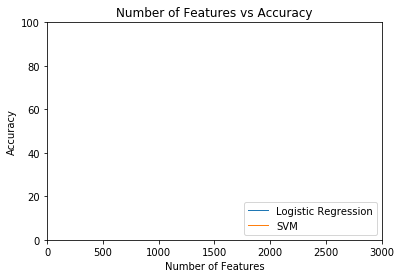

[ 0.28571429  0.6         0.5         0.6         0.36363636  0.57142857
  0.44444444  0.25        0.28571429  0.54545455  0.66666667  0.5         0.4
  0.85714286  0.44444444  0.57142857  0.75        0.6         0.8         0.8
  0.25        0.66666667  0.5         0.5         0.66666667  0.28571429
  0.57142857  0.75      ]
LR accuracy Avg: 0.7981407047626188
LR accuracy Standard Deviation: 0.0
LR f1s Avg : 0.5050179450179451
LR f1s Standard Deviation: 0.14476450858838238
SVM Avg: 0.8319735348913664
SVM Standard Deviation: 0.009240197327193578
SVM f1s Avg : 0.5008850408850408
SVM f1s Standard Deviation: 0.0
[ 0.74074074  0.77777778  0.78518519  0.79259259  0.78962963  0.80469136
  0.79026455  0.7887037   0.78995885  0.77762963  0.7810101   0.78592593
  0.79099715  0.79269841  0.80118519  0.79972222  0.80496732  0.81135802
  0.81348928  0.81540741  0.81467372  0.81468013  0.80663446  0.80802469
  0.8082963   0.80997151  0.80960219  0.80978836  0.81251596  0.81609877]


In [2]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot( (feature_num_all), lr_all_feature*100, lw=1, label='Logistic Regression')
plt.plot( (feature_num_all), svm_all_feature*100, lw=1, label='SVM')
plt.xlim([0, 3000])
plt.ylim([0, 100])
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Number of Features vs Accuracy')
plt.legend(loc="lower right")
#plt.savefig('monk_ssri_conntome_counts.eps')
plt.show()

svm_f1s=svm_f1s[np.nonzero(svm_f1s)]
print(svm_f1s)

print("LR accuracy Avg: {}".format(np.mean(lr_all_feature)))
print("LR accuracy Standard Deviation: {}".format(np.std(lr_all_feature)))

print("LR f1s Avg : {}".format(np.mean( lr_fls_feature)))
print("LR f1s Standard Deviation: {}".format(np.std(lr_f1s)))

print("SVM Avg: {}".format(np.mean(svm_all_feature)))
print("SVM Standard Deviation: {}".format(np.std(svm_all_accs)))

print("SVM f1s Avg : {}".format(np.mean( svm_fls_feature )))
print("SVM f1s Standard Deviation: {}".format(np.std(svm_fls_feature)))
print(lr_all_accs)

In [ ]:
clf = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
clf = clf.fit(X, y)
importances = clf.feature_importances_
importances
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
import numpy as np
import pandas as pd
from pprint import pprint
from os import listdir
from os.path import isfile, join
from sklearn.model_selection import StratifiedKFold
from scipy import stats
import numpy as np
from sklearn import linear_model, svm
import re
from sklearn.metrics import roc_curve, auc,f1_score
from sklearn.pipeline import Pipeline


In [ ]:
X.shape

In [ ]:
X.shape

In [ ]:
os.getcwd()
os.chdir('../idp_jiook_local/braindata')

In [ ]:
lr_all_accs.shape

In [ ]:
np.isnan(features)

In [ ]:
print(30:40)

In [ ]:
np.log(20000)